In [1]:
import numpy as np;
import pandas as pd;

from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import matthews_corrcoef,make_scorer,roc_auc_score,precision_recall_curve, auc
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
!pip install --upgrade scikit-learn
roc_auc_scoreScorer=make_scorer(roc_auc_score)
mccScorer = make_scorer(matthews_corrcoef)
from numpy import mean
from numpy import std

from google.colab import drive
drive.mount("/content/gdrive")

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import StandardScaler

Mounted at /content/gdrive


In [2]:
#read training dataset 1
data1 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset_1_Training.csv')

X_train_actual_1=data1[:-2].T[1:].values

y_train_actual_1 = data1[-2:].T[-130:].T.values

In [3]:
#read training dataset 2
data2 = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Dataset_2_Training.csv')

X_train_actual_2=data2[:-4].T[1:].values

y_train_actual_2 = data2[-4:].T[-340:].T.values

In [4]:
co1={'X':X_train_actual_1,'Y': y_train_actual_1[0]};
co2={'X':X_train_actual_1,'Y': y_train_actual_1[1]};

co3={'X':X_train_actual_2,'Y': y_train_actual_2[0]};
co4={'X':X_train_actual_2,'Y': y_train_actual_2[1]};
co5={'X':X_train_actual_2,'Y': y_train_actual_2[2]};
co6={'X':X_train_actual_2,'Y': y_train_actual_2[3]};

In [7]:
print(co1['X'].shape)

(130, 22283)


In [ ]:
def determine_number_of_top_features(X,Y):
  X=pd.DataFrame(X)
  X=X.astype(float)

  Y=pd.DataFrame(Y)
  Y=Y.astype(int)

  sel = f_classif(X, Y)
  p_values = pd.Series(sel[1])
  p_values.index = X.columns
  p_values.sort_values(ascending=True, inplace=True)
  p_values = p_values[p_values < 0.05]
  X_p = X[p_values.index]
  return X_p.shape[1]

In [ ]:
best_co1=determine_number_of_top_features(**co1)
best_co2=determine_number_of_top_features(**co2)
best_co3=determine_number_of_top_features(**co3)
best_co4=determine_number_of_top_features(**co4)
best_co5=determine_number_of_top_features(**co5)
best_co6=determine_number_of_top_features(**co6)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
def feature_selector(X,Y,numberOfFeaturesToBeSelected=1):
  if(numberOfFeaturesToBeSelected == 1):
    totalNumberOfFeatures=X.shape[1]
    numberOfFeaturesToBeSelected=totalNumberOfFeatures//2;
  # define feature selection
  fs = SelectKBest(score_func=f_classif, k=numberOfFeaturesToBeSelected)
  # apply feature selection
  return fs.fit(X, Y)

In [ ]:
def SVM_with_HPTuning(X,Y):
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X.astype(np.float32))
  # define model and parameters
  pipeline = Pipeline(
    [
      ('selector',SelectKBest(f_classif)),
      ('model',SVC(kernel='poly',cache_size=2000,class_weight='balanced'))
    ]
  )
  #kernel = ['linear','poly', 'rbf', 'sigmoid']
  C = [50,10,1.0, 0.1, 0.01]
  #gamma = ['scale','auto']
  degree=[int(x) for x in np.linspace(start = 2 , stop = 30, num = 10)]
  # define grid search
  grid = dict(model__C=C,model__degree=degree,selector__k=[int(x) for x in np.linspace(start = 2 , stop = X.shape[1]//4, num = 20)])
  cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
  search = GridSearchCV(estimator=pipeline, param_grid=grid, cv=cv, scoring=mccScorer,verbose=2)
  # execute search
  result = search.fit(X_train_scaled, Y.astype('int'))
  # summarize result
  print('Best Score: %s' % result.best_score_)
  print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
SVM_with_HPTuning(**co1);

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
[CV] model__C=50, model__degree=2, selector__k=2 .....................
[CV] ...... model__C=50, model__degree=2, selector__k=2, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=2 .....................
[CV] ...... model__C=50, model__degree=2, selector__k=2, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=2 .....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ...... model__C=50, model__degree=2, selector__k=2, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=295 ...................
[CV] .... model__C=50, model__degree=2, selector__k=295, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=295 ...................
[CV] .... model__C=50, model__degree=2, selector__k=295, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=295 ...................
[CV] .... model__C=50, model__degree=2, selector__k=295, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=588 ...................
[CV] .... model__C=50, model__degree=2, selector__k=588, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=588 ...................
[CV] .... model__C=50, model__degree=2, selector__k=588, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=588 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] .... model__C=50, model__degree=2, selector__k=588, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=881 ...................
[CV] .... model__C=50, model__degree=2, selector__k=881, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=881 ...................
[CV] .... model__C=50, model__degree=2, selector__k=881, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=881 ...................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] .... model__C=50, model__degree=2, selector__k=881, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=1174 ..................
[CV] ... model__C=50, model__degree=2, selector__k=1174, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=1174 ..................
[CV] ... model__C=50, model__degree=2, selector__k=1174, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=1174 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=2, selector__k=1174, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=1467 ..................
[CV] ... model__C=50, model__degree=2, selector__k=1467, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=1467 ..................
[CV] ... model__C=50, model__degree=2, selector__k=1467, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=1467 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=2, selector__k=1467, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=1760 ..................
[CV] ... model__C=50, model__degree=2, selector__k=1760, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=1760 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=2, selector__k=1760, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=1760 ..................
[CV] ... model__C=50, model__degree=2, selector__k=1760, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=2053 ..................
[CV] ... model__C=50, model__degree=2, selector__k=2053, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=2053 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=2, selector__k=2053, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=2053 ..................
[CV] ... model__C=50, model__degree=2, selector__k=2053, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=2346 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=2, selector__k=2346, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=2346 ..................
[CV] ... model__C=50, model__degree=2, selector__k=2346, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=2346 ..................
[CV] ... model__C=50, model__degree=2, selector__k=2346, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=2639 ..................
[CV] ... model__C=50, model__degree=2, selector__k=2639, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=2639 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=2, selector__k=2639, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=2639 ..................
[CV] ... model__C=50, model__degree=2, selector__k=2639, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=2932 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=2, selector__k=2932, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=2932 ..................
[CV] ... model__C=50, model__degree=2, selector__k=2932, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=2932 ..................
[CV] ... model__C=50, model__degree=2, selector__k=2932, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=3225 ..................
[CV] ... model__C=50, model__degree=2, selector__k=3225, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=3225 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=2, selector__k=3225, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=3225 ..................
[CV] ... model__C=50, model__degree=2, selector__k=3225, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=3518 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=2, selector__k=3518, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=3518 ..................
[CV] ... model__C=50, model__degree=2, selector__k=3518, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=3518 ..................
[CV] ... model__C=50, model__degree=2, selector__k=3518, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=3811 ..................
[CV] ... model__C=50, model__degree=2, selector__k=3811, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=3811 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=2, selector__k=3811, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=3811 ..................
[CV] ... model__C=50, model__degree=2, selector__k=3811, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=4104 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=2, selector__k=4104, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=4104 ..................
[CV] ... model__C=50, model__degree=2, selector__k=4104, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=4104 ..................
[CV] ... model__C=50, model__degree=2, selector__k=4104, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=4397 ..................
[CV] ... model__C=50, model__degree=2, selector__k=4397, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=4397 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=2, selector__k=4397, total=   0.1s
[CV] model__C=50, model__degree=2, selector__k=4397 ..................
[CV] ... model__C=50, model__degree=2, selector__k=4397, total=   0.2s
[CV] model__C=50, model__degree=2, selector__k=4690 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=2, selector__k=4690, total=   0.2s
[CV] model__C=50, model__degree=2, selector__k=4690 ..................
[CV] ... model__C=50, model__degree=2, selector__k=4690, total=   0.2s
[CV] model__C=50, model__degree=2, selector__k=4690 ..................
[CV] ... model__C=50, model__degree=2, selector__k=4690, total=   0.2s
[CV] model__C=50, model__degree=2, selector__k=4983 ..................
[CV] ... model__C=50, model__degree=2, selector__k=4983, total=   0.2s
[CV] model__C=50, model__degree=2, selector__k=4983 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=2, selector__k=4983, total=   0.2s
[CV] model__C=50, model__degree=2, selector__k=4983 ..................
[CV] ... model__C=50, model__degree=2, selector__k=4983, total=   0.2s
[CV] model__C=50, model__degree=2, selector__k=5276 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=2, selector__k=5276, total=   0.2s
[CV] model__C=50, model__degree=2, selector__k=5276 ..................
[CV] ... model__C=50, model__degree=2, selector__k=5276, total=   0.2s
[CV] model__C=50, model__degree=2, selector__k=5276 ..................
[CV] ... model__C=50, model__degree=2, selector__k=5276, total=   0.2s
[CV] model__C=50, model__degree=2, selector__k=5570 ..................
[CV] ... model__C=50, model__degree=2, selector__k=5570, total=   0.2s
[CV] model__C=50, model__degree=2, selector__k=5570 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=2, selector__k=5570, total=   0.2s
[CV] model__C=50, model__degree=2, selector__k=5570 ..................
[CV] ... model__C=50, model__degree=2, selector__k=5570, total=   0.2s
[CV] model__C=50, model__degree=5, selector__k=2 .....................
[CV] ...... model__C=50, model__degree=5, selector__k=2, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=2 .....................
[CV] ...... model__C=50, model__degree=5, selector__k=2, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=2 .....................
[CV] ...... model__C=50, model__degree=5, selector__k=2, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=295 ...................
[CV] .... model__C=50, model__degree=5, selector__k=295, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=295 ...................
[CV] .... model__C=50, model__degree=5, selector__k=295, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=295 ...................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=5, selector__k=1467, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=1467 ..................
[CV] ... model__C=50, model__degree=5, selector__k=1467, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=1760 ..................
[CV] ... model__C=50, model__degree=5, selector__k=1760, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=1760 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=5, selector__k=1760, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=1760 ..................
[CV] ... model__C=50, model__degree=5, selector__k=1760, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=2053 ..................
[CV] ... model__C=50, model__degree=5, selector__k=2053, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=2053 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=5, selector__k=2053, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=2053 ..................
[CV] ... model__C=50, model__degree=5, selector__k=2053, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=2346 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=5, selector__k=2346, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=2346 ..................
[CV] ... model__C=50, model__degree=5, selector__k=2346, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=2346 ..................
[CV] ... model__C=50, model__degree=5, selector__k=2346, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=2639 ..................
[CV] ... model__C=50, model__degree=5, selector__k=2639, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=2639 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=5, selector__k=2639, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=2639 ..................
[CV] ... model__C=50, model__degree=5, selector__k=2639, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=2932 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=5, selector__k=2932, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=2932 ..................
[CV] ... model__C=50, model__degree=5, selector__k=2932, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=2932 ..................
[CV] ... model__C=50, model__degree=5, selector__k=2932, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=3225 ..................
[CV] ... model__C=50, model__degree=5, selector__k=3225, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=3225 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=5, selector__k=3225, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=3225 ..................
[CV] ... model__C=50, model__degree=5, selector__k=3225, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=3518 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=5, selector__k=3518, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=3518 ..................
[CV] ... model__C=50, model__degree=5, selector__k=3518, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=3518 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=5, selector__k=3518, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=3811 ..................
[CV] ... model__C=50, model__degree=5, selector__k=3811, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=3811 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=5, selector__k=3811, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=3811 ..................
[CV] ... model__C=50, model__degree=5, selector__k=3811, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=4104 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=5, selector__k=4104, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=4104 ..................
[CV] ... model__C=50, model__degree=5, selector__k=4104, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=4104 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=5, selector__k=4104, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=4397 ..................
[CV] ... model__C=50, model__degree=5, selector__k=4397, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=4397 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=5, selector__k=4397, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=4397 ..................
[CV] ... model__C=50, model__degree=5, selector__k=4397, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=4690 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=5, selector__k=4690, total=   0.1s
[CV] model__C=50, model__degree=5, selector__k=4690 ..................
[CV] ... model__C=50, model__degree=5, selector__k=4690, total=   0.2s
[CV] model__C=50, model__degree=5, selector__k=4690 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=5, selector__k=4690, total=   0.2s
[CV] model__C=50, model__degree=5, selector__k=4983 ..................
[CV] ... model__C=50, model__degree=5, selector__k=4983, total=   0.2s
[CV] model__C=50, model__degree=5, selector__k=4983 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=5, selector__k=4983, total=   0.2s
[CV] model__C=50, model__degree=5, selector__k=4983 ..................
[CV] ... model__C=50, model__degree=5, selector__k=4983, total=   0.2s
[CV] model__C=50, model__degree=5, selector__k=5276 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=5, selector__k=5276, total=   0.2s
[CV] model__C=50, model__degree=5, selector__k=5276 ..................
[CV] ... model__C=50, model__degree=5, selector__k=5276, total=   0.2s
[CV] model__C=50, model__degree=5, selector__k=5276 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


[CV] ... model__C=50, model__degree=5, selector__k=5276, total=   0.2s
[CV] model__C=50, model__degree=5, selector__k=5570 ..................
[CV] ... model__C=50, model__degree=5, selector__k=5570, total=   0.2s
[CV] model__C=50, model__degree=5, selector__k=5570 ..................


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


KeyboardInterrupt: ignored

In [ ]:
SVM_with_HPTuning(**co2);

In [ ]:
SVM_with_HPTuning(**co3);

In [ ]:
def plot_PRC_for_CV(predictor,k_fold,X,y,label):
  f, axes = plt.subplots(1,1,squeeze=False)
  
  y_real = []
  y_proba = []
  
  for i, (train_index, test_index) in enumerate(k_fold.split(X,y)):
    Xtrain, Xtest = X[train_index], X[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    predictor.fit(Xtrain, ytrain)
    pred_proba = predictor.predict_proba(Xtest)
    precision, recall, _ = precision_recall_curve(ytest, pred_proba[:,1])
    lab = 'Fold %d AUC=%.4f' % (i+1, auc(recall, precision))
    axes[0,0].step(recall, precision, label=lab)
    y_real.append(ytest)
    y_proba.append(pred_proba[:,1])

  y_real = np.concatenate(y_real)
  y_proba = np.concatenate(y_proba)
  precision, recall, _ = precision_recall_curve(y_real, y_proba)
  lab = 'Overall AUC=%.4f' % (auc(recall, precision))
  axes[0,0].step(recall, precision, label=lab, lw=2, color='black')
  axes[0,0].set_xlabel('Recall')
  axes[0,0].set_ylabel('Precision')
  axes[0,0].legend(loc='lower left', fontsize='small')
  axes[0,0].set(title=label)

  # f.tight_layout()
  f.savefig(label+'.png')

In [ ]:
def plot_ROC_for_CV(classifier,cv,X,y,label):
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)

  fig, ax = plt.subplots()
  for i, (train, test) in enumerate(cv.split(X, y)):
      classifier.fit(X[train], y[train])
      viz = RocCurveDisplay.from_estimator(
          classifier,
          X[test],
          y[test],
          name="ROC fold {}".format(i),
          alpha=0.3,
          lw=1,
          ax=ax,
      )
      interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
      interp_tpr[0] = 0.0
      tprs.append(interp_tpr)
      aucs.append(viz.roc_auc)

  ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  std_auc = np.std(aucs)
  ax.plot(
      mean_fpr,
      mean_tpr,
      color="b",
      label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
      lw=2,
      alpha=0.8,
  )

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  ax.fill_between(
      mean_fpr,
      tprs_lower,
      tprs_upper,
      color="grey",
      alpha=0.2,
      label=r"$\pm$ 1 std. dev.",
  )

  ax.set(
      xlim=[-0.05, 1.05],
      ylim=[-0.05, 1.05],
      title=label,
  )
  ax.legend(loc="lower right")
  plt.show()
  fig.savefig(label+'.png')

In [ ]:
def SVM_with_cross_validation(X,Y,C,gamma,kernel,endpointLabel,degree=5,numberOfFeaturesSelected=1):
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X.astype(np.float32))

  scoringReports={'mccScorer': mccScorer,'accuracy': 'accuracy','precision':'precision','recall':'recall', 'f1':'f1','ruc_auc':roc_auc_scoreScorer}
  
  # define model ,class_weight='balanced'
  model = SVC(cache_size=2000,class_weight='balanced',C=C,gamma=gamma,kernel=kernel,degree=degree)
  # define evaluation
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)

  X_selected_features=feature_selector(X_train_scaled,Y,numberOfFeaturesToBeSelected=numberOfFeaturesSelected).transform(X_train_scaled);
  
  scores = cross_validate(model,X_selected_features , Y.astype('int'), scoring=scoringReports, cv=cv)

  # summarize result
  print(model.get_params())
  print('MCC Score- Mean: %.3f SD: (%.3f)' % (mean(scores['test_mccScorer']), std(scores['test_mccScorer'])))
  print(list(scores.keys()))
  print("Means",mean(list(scores.values()),axis=1))
  print("SD",std(list(scores.values()),axis=1))
  plot_ROC_for_CV(model,cv,X_selected_features,Y.astype('int'),'ROC-SVM-'+endpointLabel)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined a

{'C': 0.5, 'break_ties': False, 'cache_size': 2000, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 5, 'gamma': 'auto', 'kernel': 'poly', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
MCC Score- Mean: 0.066 SD: (0.132)
['fit_time', 'score_time', 'test_mccScorer', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_ruc_auc']
Means [0.02249889 0.01102781 0.06590036 0.75384615 0.2        0.02857143
 0.05       0.51428571]
SD [2.89347263e-04 6.60969887e-04 1.31800715e-01 1.88422288e-02
 4.00000000e-01 5.71428571e-02 1.00000000e-01 2.85714286e-02]


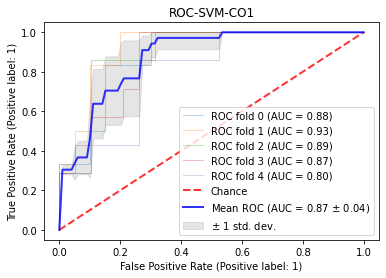

In [ ]:
SVM_with_cross_validation(co1['X'],co1['Y'],0.5,'auto','poly','CO1',5,best_co1)

In [ ]:
SVM_with_cross_validation(co2['X'],co2['Y'],0.1,'scale','rbf','CO2',1,best_co2)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = co

{'C': 0.1, 'break_ties': False, 'cache_size': 2000, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
MCC Score- Mean: 0.063 SD: (0.128)
['fit_time', 'score_time', 'test_mccScorer', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_ruc_auc']
Means [0.0475971  0.01031842 0.06324096 0.58461538 0.24230769 0.32
 0.22631579 0.51714286]
SD [0.00159877 0.0005228  0.12836188 0.07050116 0.32998566 0.44899889
 0.29002605 0.03487587]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
SVM_with_cross_validation(co3['X'],co3['Y'],10,'scale','rbf',1,best_co3)

{'C': 10, 'break_ties': False, 'cache_size': 2000, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
MCC Score- Mean: 0.406 SD: (0.129)
['fit_time', 'score_time', 'test_mccScorer', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_ruc_auc']
Means [1.0925431  0.11792932 0.40645584 0.80294118 0.77722222 0.35
 0.44917638 0.64953846]
SD [0.01110338 0.00347819 0.12851846 0.04169837 0.2085288  0.14390926
 0.14458516 0.06300474]


In [ ]:
SVM_with_cross_validation(co4['X'],co4['Y'],10,'scale','rbf',1,best_co4)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn

{'C': 10, 'break_ties': False, 'cache_size': 2000, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
MCC Score- Mean: 0.270 SD: (0.301)
['fit_time', 'score_time', 'test_mccScorer', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_ruc_auc']
Means [0.75822601 0.08119586 0.26959167 0.87352941 0.475      0.19666667
 0.26071429 0.59488506]
SD [0.00842572 0.00289218 0.30096957 0.03492454 0.48023432 0.23685439
 0.29094663 0.11711635]


In [ ]:
SVM_with_cross_validation(co5['X'],co5['Y'],10,'scale','rbf',1,best_co5)

{'C': 10, 'break_ties': False, 'cache_size': 2000, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
MCC Score- Mean: 0.864 SD: (0.080)
['fit_time', 'score_time', 'test_mccScorer', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_ruc_auc']
Means [0.39330313 0.04596045 0.86366277 0.93235294 0.93677198 0.90428571
 0.91837609 0.92924812]
SD [0.00618599 0.00036847 0.07972511 0.03956948 0.04748649 0.07430555
 0.04955095 0.0424287 ]


In [ ]:
SVM_with_cross_validation(co6['X'],co6['Y'],50,'scale','rbf',1,best_co6)

{'C': 50, 'break_ties': False, 'cache_size': 2000, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
MCC Score- Mean: 0.549 SD: (0.178)
['fit_time', 'score_time', 'test_mccScorer', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_ruc_auc']
Means [0.4470655  0.05419483 0.54895839 0.78235294 0.76932434 0.9
 0.82903524 0.75714286]
SD [0.00493966 0.0018036  0.17799089 0.08235294 0.0598717  0.08062258
 0.06653138 0.08416759]
